In [ ]:
import numpy as np
import pandas as pd

In [ ]:
! pip install pandas_datareader

In [ ]:
import pandas_datareader as pdr

In [ ]:
df=pdr.get_data_tiingo('AAPL', api_key='3406cec2b00e881a3c9cf8a9284d55e7120bb1c4')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df1=pd.read_csv('AAPL.csv', index_col='date', parse_dates=True)

In [ ]:
df1

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-03-02 00:00:00+00:00,AAPL,138.96,140.2786,138.7600,140.000,26210984,32.795092,33.106286,32.747891,33.040536,104843936,0.0,1.0
2017-03-03 00:00:00+00:00,AAPL,139.78,139.8300,138.5900,138.780,21571121,32.988615,33.000415,32.707770,32.752611,86284484,0.0,1.0
2017-03-06 00:00:00+00:00,AAPL,139.34,139.7700,138.5959,139.365,21750044,32.884773,32.986255,32.709163,32.890673,87000176,0.0,1.0
2017-03-07 00:00:00+00:00,AAPL,139.52,139.9800,138.7900,139.060,17446297,32.927254,33.035816,32.754971,32.818692,69785188,0.0,1.0
2017-03-08 00:00:00+00:00,AAPL,139.00,139.8000,138.8200,138.950,18707236,32.804532,32.993335,32.762051,32.792732,74828944,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22 00:00:00+00:00,AAPL,164.32,166.6900,162.1500,164.980,90457637,164.320000,166.690000,162.150000,164.980000,90457637,0.0,1.0
2022-02-23 00:00:00+00:00,AAPL,160.07,166.1500,159.7500,165.540,90009247,160.070000,166.150000,159.750000,165.540000,90009247,0.0,1.0
2022-02-24 00:00:00+00:00,AAPL,162.74,162.8500,152.0000,152.580,141147540,162.740000,162.850000,152.000000,152.580000,141147540,0.0,1.0


In [ ]:
df2=df1['close']

In [ ]:
df2

date
2017-03-02 00:00:00+00:00    138.96
2017-03-03 00:00:00+00:00    139.78
2017-03-06 00:00:00+00:00    139.34
2017-03-07 00:00:00+00:00    139.52
2017-03-08 00:00:00+00:00    139.00
                              ...  
2022-02-22 00:00:00+00:00    164.32
2022-02-23 00:00:00+00:00    160.07
2022-02-24 00:00:00+00:00    162.74
2022-02-25 00:00:00+00:00    164.85
2022-02-28 00:00:00+00:00    165.12
Name: close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
train=np.array(df2.iloc[:1000]).reshape(-1,1)
test=np.array(df2.iloc[1000:1259]).reshape(-1,1)

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [ ]:
model=Sequential()
model.add(LSTM(100, activation='relu' , input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=50)

Epoch 1/50
8/8 [==============================] - 5s 53ms/step - loss: 0.0753
Epoch 2/50
8/8 [==============================] - 1s 56ms/step - loss: 0.0419
Epoch 3/50
8/8 [==============================] - 1s 75ms/step - loss: 0.0233
Epoch 4/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0101
Epoch 5/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0063
Epoch 6/50
8/8 [==============================] - 1s 59ms/step - loss: 0.0042
Epoch 7/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0041
Epoch 8/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0045
Epoch 9/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0037
Epoch 10/50
8/8 [==============================] - 1s 70ms/step - loss: 0.0033
Epoch 11/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0031
Epoch 12/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0028
Epoch 13/50
8/8 [==============================] - 0s 51ms/st

In [ ]:
loss_per_epoch=model.history.history['loss']

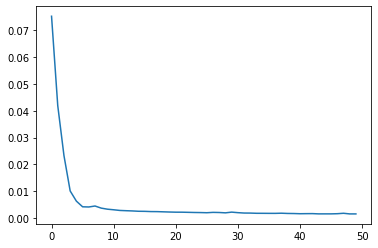

In [ ]:
plt.plot(loss_per_epoch)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_predictions=[]
last_eval_batch=scaled_train[-n_input:]
current_batch=last_eval_batch.reshape(1,n_input,n_features)
for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.07738557], dtype=float32),
 array([0.07979169], dtype=float32),
 array([0.08280857], dtype=float32),
 array([0.08623719], dtype=float32),
 array([0.08989476], dtype=float32),
 array([0.09360647], dtype=float32),
 array([0.09725542], dtype=float32),
 array([0.10087977], dtype=float32),
 array([0.10446577], dtype=float32),
 array([0.10798965], dtype=float32),
 array([0.11140276], dtype=float32),
 array([0.11470461], dtype=float32),
 array([0.11788931], dtype=float32),
 array([0.12110664], dtype=float32),
 array([0.12428363], dtype=float32),
 array([0.12740354], dtype=float32),
 array([0.1304666], dtype=float32),
 array([0.13348381], dtype=float32),
 array([0.13645557], dtype=float32),
 array([0.13938096], dtype=float32),
 array([0.142263], dtype=float32),
 array([0.14510345], dtype=float32),
 array([0.14790875], dtype=float32),
 array([0.15067701], dtype=float32),
 array([0.15342027], dtype=float32),
 array([0.1561445], dtype=float32),
 array([0.15885116], dtype=float32),
 arra

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[137.73619065],
       [138.69683418],
       [139.9013212 ],
       [141.27019897],
       [142.7304816 ],
       [144.21238395],
       [145.6692279 ],
       [147.11624957],
       [148.54795777],
       [149.95486934],
       [151.31755389],
       [152.63581511],
       [153.90730897],
       [155.19182582],
       [156.46023795],
       [157.7058643 ],
       [158.92878817],
       [160.13341203],
       [161.3198846 ],
       [162.48784894],
       [163.63850085],
       [164.77255424],
       [165.89256732],
       [166.99779641],
       [168.09304259],
       [169.18069154],
       [170.26132627],
       [171.33178177],
       [172.39621659],
       [173.45440465],
       [174.50544762],
       [175.55024979],
       [176.59249971],
       [177.6300021 ],
       [178.66360176],
       [179.69345931],
       [180.71960451],
       [181.74369125],
       [182.77094897],
       [183.79803415],
       [184.83244886],
       [185.87399082],
       [186.91430722],
       [187

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,true_predictions))
print(rmse)

136.95730652890376


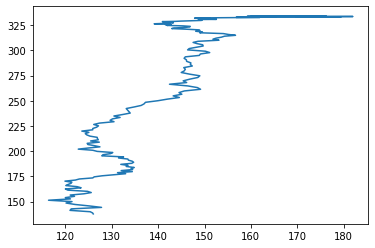

In [ ]:
plt.plot(test,true_predictions)